In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#http://cocodataset.org/#keypoints-2018
arquivo_proto= '...'#arquivo omitido
arquivo_pesos = '...'#arquivo omitido
imagem = cv2.imread('monk-4735530_1920.jpg')

In [3]:
numero_pontos =15
pares_pontos = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7],[1,14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]
cor_ponto, cor_linha = (255, 128, 0), (7, 62, 248)
imagem_copia = np.copy(imagem)
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [4]:
#cv2.imshow('imagem',imagem)
#cv2.waitKey(0)

In [5]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto,arquivo_pesos)
altura_entrada =400
largura_entrada =int(altura_entrada / imagem_altura * imagem_largura)
blob_entrada= cv2.dnn.blobFromImage(image=imagem, scalefactor=1.0/255,size=( largura_entrada,altura_entrada),mean=(0,0,0),swapRB=False,crop=False)
modelo.setInput(blob_entrada)
saida =  modelo.forward()

In [6]:
pontos = []
limite = 0.1
altura = saida.shape[2]
largura = saida.shape[3]

In [7]:
for i in range(numero_pontos):
    mapa_confianca = saida[0, i, :, :]
    _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
    x = (imagem_largura * ponto[0]) / largura
    y = (imagem_altura * ponto[1] / altura)
    if confianca > limite:
        cv2.circle(imagem_copia, (int(x), int(y)), 8, cor_ponto, thickness=-1,lineType=cv2.FILLED)
        cv2.putText(imagem_copia, "{}".format(i), (int(x), int(y)),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, lineType=cv2.LINE_AA)
        pontos.append((int(x), int(y)))
    else:
        pontos.append(None)

In [8]:
tamanho = cv2.resize(imagem, (imagem_largura, imagem_altura))
mapa_suave = cv2.GaussianBlur(tamanho, (3,3), 0, 0)
mascara_mapa = np.uint8(mapa_suave > limite)

In [9]:
for i,v in enumerate(pares_pontos):
    print(i," = ",v)
    parteA = v[0]
    parteB = v[1]
    if pontos[parteA] and pontos[parteB]:
        cv2.line(imagem, pontos[parteA], pontos[parteB], cor_linha, 3)
        cv2.circle(imagem, pontos[parteA], 8, cor_ponto, thickness=-1,lineType=cv2.LINE_AA)
        cv2.line(mascara_mapa, pontos[parteA], pontos[parteB], cor_linha, 3)
        cv2.circle(mascara_mapa, pontos[parteA], 8, cor_ponto, thickness=-1,lineType=cv2.LINE_AA)

0  =  [0, 1]
1  =  [1, 2]
2  =  [2, 3]
3  =  [3, 4]
4  =  [1, 5]
5  =  [5, 6]
6  =  [6, 7]
7  =  [1, 14]
8  =  [14, 8]
9  =  [8, 9]
10  =  [9, 10]
11  =  [14, 11]
12  =  [11, 12]
13  =  [12, 13]


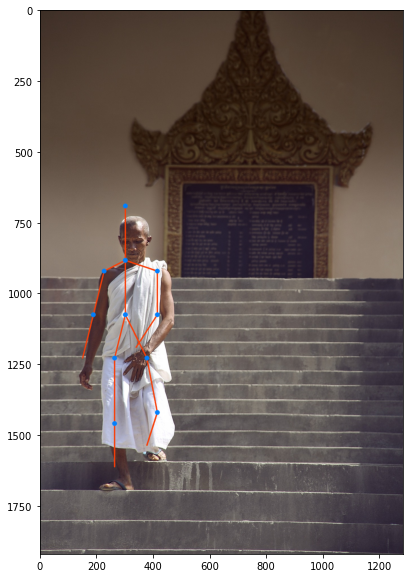

In [10]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))